<a href="https://colab.research.google.com/github/rezendervp/chemical-engineering/blob/main/Condu%C3%A7%C3%A3o_RK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tempo de execução: 0.01 segundos


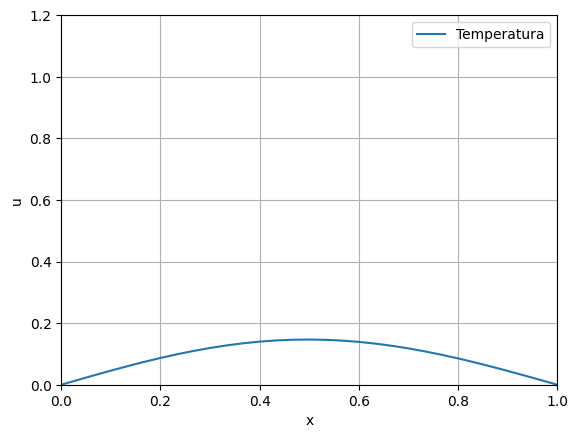

In [ ]:

"""Condução unidimensinal transiente com fonte

   =================================================================================

   Formulação IMPLÍCITA no tempo (theta = 1)
   Discretização no tempo Runge-Kutta de 4a ordem  dT/dt= f(T,x)
   Neste caso, há montagem de matriz, as equações são resolvidas  a cada
   passo de tempo
   MAS A QUANTO MAIOR A ORDEM, MAIS SUJEITO A INSTABILIDADES
   (TESTE MODIFICANDO O PASOS DE TEMPO E O REFINAMENTO DE MALHA)
   Discretização no espaço CDS  (2a ordem)

   =================================================================================

   Introdução à Fluidodinâmica Computacional

   Prof. Dr. Ricardo V. P. Rezende  ©2024

   =================================================================================

   OBS.: a solução é rápida, mas a montagem do vídeo é mais demorada,
   verifique o tmepo  de computação mostrado - ele considera somente a
   a montagem e inversão da matriz
"""



import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

# Parâmetros do problema
L = 1.0        # Comprimento do domínio
T = 10        # Tempo total
alpha = 0.01   # Difusividade térmica
Nx = 31        # Número de pontos no espaço
Nt = 200      # Número de passos de tempo
dx = L / (Nx - 1)  # Espaçamento espacial
dt = T / Nt    # Passo de tempo


# Marca o tempo de início
start_time = time.time()

# Condição inicial
u0 = np.zeros(Nx)
u0[int(0.4 * Nx):int(0.6 * Nx)] = 1  # Pico inicial

# Discretização espacial
def dudx2(u, dx):
    dudx2 = np.zeros_like(u)
    dudx2[1:-1] = (u[2:] - 2*u[1:-1] + u[:-2]) / dx**2
    return dudx2

# Função f para a equação de condução de calor
def f(u, alpha, dx):
    return alpha * dudx2(u, dx)

# Método de Runge-Kutta de 4ª ordem
def rk4_step(u, dt, alpha, dx):
    k1 = f(u, alpha, dx)
    k2 = f(u + dt/2 * k1, alpha, dx)
    k3 = f(u + dt/2 * k2, alpha, dx)
    k4 = f(u + dt * k3, alpha, dx)
    return u + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

# Solução no tempo
u = u0.copy()
u_all = [u0.copy()]  # Para armazenar todas as soluções ao longo do tempo

for n in range(1, Nt + 1):
    u = rk4_step(u, dt, alpha, dx)
    u[0] = 0  # Condição de contorno
    u[-1] = 0  # Condição de contorno
    u_all.append(u.copy())

# Marca o tempo de fim
end_time = time.time()

# Imprime o tempo de execução
print("Tempo de execução: {:.2f} segundos".format(end_time - start_time))

# Configuração da animação
fig, ax = plt.subplots()
x = np.linspace(0, L, Nx)
line, = ax.plot(x, u0, label='Temperatura')
ax.set_xlim(0, L)
ax.set_ylim(0, 1.2)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.legend()
ax.grid(True)

def animate(i):
    line.set_ydata(u_all[i])
    return line,

ani = animation.FuncAnimation(fig, animate, frames=Nt+1, interval=50, blit=True)

# Salvando a animação em um arquivo MP4
ani.save('conducao_calor_rk4.mp4', writer='ffmpeg')

# Exibindo o vídeo no Google Colab
from IPython.display import Video
Video("conducao_calor_rk4.mp4")
